Columns in first dataset: ['S No', 'Company', 'Pricing Strategy']
Columns in second dataset: ['S No', 'Company', 'Pricing Strategy']

Numerical Summary:
-----------------
Total number of companies: 195

Strategy Distribution:
Pricing Strategy
Value-based     162
Competitive      11
Dynamic          10
Penetration       5
Tiered            4
Premium           1
Subscription      1
Name: count, dtype: int64

Percentage Distribution (should sum to 100%):
Pricing Strategy
Value-based     83.08
Competitive      5.64
Dynamic          5.13
Penetration      2.56
Tiered           2.05
Premium          0.51
Subscription     0.51
Name: count, dtype: float64
Sum of percentages: 99.48%

Distribution in First Dataset:
Pricing Strategy
Value-based     82.500000
Dynamic          5.833333
Penetration      3.333333
Competitive      3.333333
Tiered           3.333333
Premium          0.833333
Subscription     0.833333
Name: proportion, dtype: float64

Distribution in Second Dataset:
Pricing Strategy
Valu

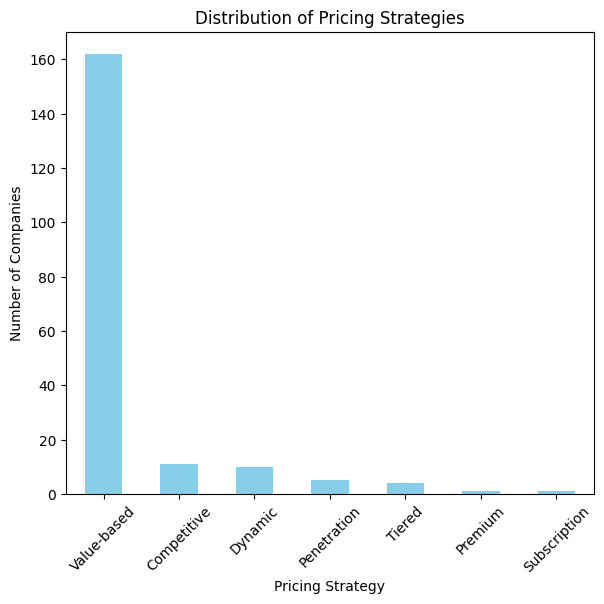

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read both Excel files
df1 = pd.read_excel('/content/Sheet1_AI_ML_MD_Pricing_Strategy.xlsx')
df2 = pd.read_excel('/content/Sheet2_ AI_ML_Pricing_Strategy.xlsx')

# Check column names in both dataframes
print("Columns in first dataset:", df1.columns.tolist())
print("Columns in second dataset:", df2.columns.tolist())

# Ensure column names are consistent
# If the column names are different, rename them to match
if 'Pricing Strategy' not in df2.columns:
    # Check if there's a similar column with different naming
    possible_columns = [col for col in df2.columns if 'pricing' in col.lower() or 'strategy' in col.lower()]
    if possible_columns:
        df2 = df2.rename(columns={possible_columns[0]: 'Pricing Strategy'})

# Merge datasets
merged_df1 = pd.concat([df1, df2], ignore_index=True)

# Calculate distribution
strategy_distribution = merged_df1['Pricing Strategy'].value_counts()
total_companies = len(merged_df1)

# Calculate percentages (ensuring they sum to 100%)
percentages = (strategy_distribution / total_companies * 100).round(2)

# Create visualizations
plt.figure(figsize=(15, 6))

# Bar Plot
plt.subplot(1, 2, 1)
strategy_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Pricing Strategies')
plt.xlabel('Pricing Strategy')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)

# Print numerical summaries
print("\nNumerical Summary:")
print("-----------------")
print("Total number of companies:", total_companies)
print("\nStrategy Distribution:")
print(strategy_distribution)
print("\nPercentage Distribution (should sum to 100%):")
print(percentages)
print(f"Sum of percentages: {percentages.sum():.2f}%")

# Separate analysis for each dataset
print("\nDistribution in First Dataset:")
print(df1['Pricing Strategy'].value_counts(normalize=True) * 100)

print("\nDistribution in Second Dataset:")
print(df2['Pricing Strategy'].value_counts(normalize=True) * 100)


Columns in first dataset: ['S No', 'Company', 'Pricing Strategy']
Columns in second dataset: ['S No', 'Company', 'Pricing Strategy']


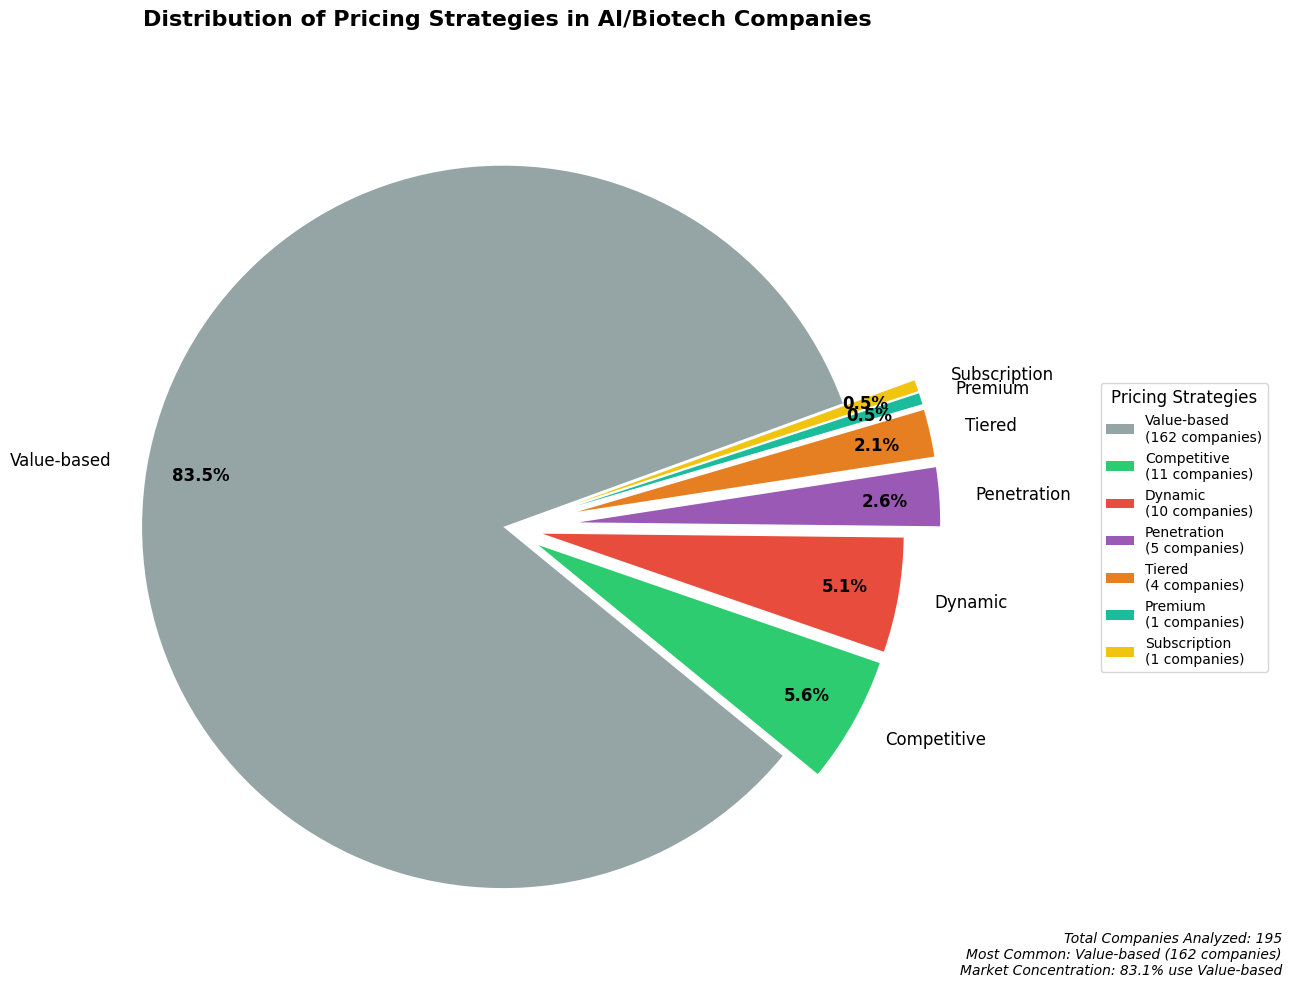


Detailed Analysis of Pricing Strategies:
----------------------------------------
    Strategy  Number of Companies  Percentage
 Value-based                  162        83.1
 Competitive                   11         5.6
     Dynamic                   10         5.1
 Penetration                    5         2.6
      Tiered                    4         2.1
     Premium                    1         0.5
Subscription                    1         0.5

Key Insights:
----------------------------------------
• Total companies analyzed: 195
• Number of different strategies: 7
• Most common strategy: Value-based (83.1%)
• Least common strategy: Subscription (0.5%)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read both Excel files
df1 = pd.read_excel('/content/Sheet1_AI_ML_MD_Pricing_Strategy.xlsx')
df2 = pd.read_excel('/content/Sheet2_ AI_ML_Pricing_Strategy.xlsx')

# Check column names in both dataframes
print("Columns in first dataset:", df1.columns.tolist())
print("Columns in second dataset:", df2.columns.tolist())

# Ensure column names are consistent
# If the column names are different, rename them to match
if 'Pricing Strategy' not in df2.columns:
    # Check if there's a similar column with different naming
    possible_columns = [col for col in df2.columns if 'pricing' in col.lower() or 'strategy' in col.lower()]
    if possible_columns:
        df2 = df2.rename(columns={possible_columns[0]: 'Pricing Strategy'})

# Merge datasets
merged_df2 = pd.concat([df1, df2], ignore_index=True)

# Perform the analysis
strategy_counts = merged_df2['Pricing Strategy'].value_counts()
total_companies = len(merged_df2)
strategy_percentages = (strategy_counts / total_companies * 100).round(1)

# Create figure with larger size
plt.figure(figsize=(15, 10))

# Define colors for better contrast
colors = {
    'Value-Based': '#3498db',    # Blue
    'Dynamic': '#e74c3c',        # Red
    'Competitive': '#2ecc71',    # Green
    'Penetration': '#9b59b6',    # Purple
    'Subscription': '#f1c40f',   # Yellow
    'Tiered': '#e67e22',        # Orange
    'Premium': '#1abc9c'         # Turquoise
}

# Create explode effect - more pronounced for smaller segments
explode = []
for value in strategy_percentages:
    if value > 20:  # Large segment (Value-Based)
        explode.append(0.01)
    elif value > 5:  # Medium segments (Dynamic, Competitive)
        explode.append(0.1)
    else:  # Small segments (Penetration, Subscription, Tiered, Premium)
        explode.append(0.2)

# Sort the data to group similar-sized segments together
sorted_data = strategy_percentages.sort_values(ascending=False)

# Create pie chart with improved visibility
wedges, texts, autotexts = plt.pie(sorted_data,
                                  labels=sorted_data.index,
                                  colors=[colors.get(x, '#95a5a6') for x in sorted_data.index],
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,
                                  explode=explode,
                                  startangle=20,
                                  labeldistance=1.1
                                  )

# Enhance text properties
plt.setp(autotexts, size=12, weight='bold')
plt.setp(texts, size=12)

# Add title
plt.title('Distribution of Pricing Strategies in AI/Biotech Companies\n',
          pad=20,
          size=16,
          weight='bold')

# Create detailed legend with company counts
legend_labels = [f"{strategy}\n({count} companies)"
                for strategy, count in zip(sorted_data.index, strategy_counts[sorted_data.index])]

plt.legend(wedges,
          legend_labels,
          title="Pricing Strategies",
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10,
          title_fontsize=12)

# Add analysis summary
summary_text = (
    f"Total Companies Analyzed: {total_companies}\n"
    f"Most Common: {strategy_counts.index[0]} ({strategy_counts.iloc[0]} companies)\n"
    f"Market Concentration: {strategy_percentages.iloc[0]:.1f}% use {strategy_counts.index[0]}"
)

plt.figtext(0.99, 0.02,
            summary_text,
            ha='right',
            fontsize=10,
            style='italic')

# Ensure layout is tight but readable
plt.tight_layout()

# Save high-resolution figure
plt.savefig('pricing_strategies_analysis.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)

# Show plot
plt.show()

# Print detailed analysis
print("\nDetailed Analysis of Pricing Strategies:")
print("-" * 40)
analysis_df = pd.DataFrame({
    'Strategy': strategy_counts.index,
    'Number of Companies': strategy_counts.values,
    'Percentage': strategy_percentages.values
}).sort_values('Number of Companies', ascending=False)

print(analysis_df.to_string(index=False))

# Additional insights
print("\nKey Insights:")
print("-" * 40)
print(f"• Total companies analyzed: {total_companies}")
print(f"• Number of different strategies: {len(strategy_counts)}")
print(f"• Most common strategy: {strategy_counts.index[0]} ({strategy_percentages.iloc[0]:.1f}%)")
print(f"• Least common strategy: {strategy_counts.index[-1]} ({strategy_percentages.iloc[-1]:.1f}%)")
